In [1]:
import pandas as pd
df=pd.read_csv('train_ctrUa4K.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.isnull().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [5]:
# taking only numerical data
df=df.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [6]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,NaN,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0


In [8]:
df.isnull().mean()

Dependents           0.024430
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
dtype: float64

In [9]:
x=df.iloc[:,1:]
x.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


In [11]:
y=df.iloc[:,0]
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [12]:
from sklearn.model_selection import train_test_split as tts

In [13]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [14]:
x_train.shape,y_test.shape

((491, 5), (123,))

In [15]:
x_train.isnull().mean()

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.038697
Loan_Amount_Term     0.020367
Credit_History       0.073320
dtype: float64

In [17]:
LoanAmount_mean=x_train['LoanAmount'].mean()
LoanAmount_median=x_train['LoanAmount'].median()
Loan_Amount_Term_mean=x_train['Loan_Amount_Term'].mean()
Loan_Amount_Term_median=x_train['Loan_Amount_Term'].median()
Credit_History_mean=x_train['Credit_History'].mean()
Credit_History_median=x_train['Credit_History'].median()

In [18]:
x_train['LoanAmount_mean']=x_train['LoanAmount'].fillna(LoanAmount_mean)

In [20]:
x_train.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_mean
328,4333,2451.0,110.0,360.0,1.0,110.000000
329,2500,0.0,67.0,360.0,1.0,67.000000
112,3572,4114.0,152.0,NaN,0.0,152.000000
435,10047,0.0,NaN,240.0,1.0,147.084746
426,4606,0.0,81.0,360.0,1.0,81.000000


In [23]:
x_train['Credit_History_mean']=x_train['Credit_History'].fillna(x_train['Credit_History'].mean())

In [24]:
x_train.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_mean,Credit_History_mean
514,5815,3666.0,311.0,360.0,1.0,311.0,1.0
356,8333,3167.0,165.0,360.0,1.0,165.0,1.0
204,3917,0.0,124.0,360.0,1.0,124.0,1.0
462,3015,2188.0,153.0,360.0,1.0,153.0,1.0
511,6065,2004.0,250.0,360.0,1.0,250.0,1.0


In [25]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [27]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [31]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['LoanAmount']),
    ('imputer2',imputer2,['Credit_History'])
],remainder='passthrough')

In [32]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['LoanAmount']),
                                ('imputer2', SimpleImputer(),
                                 ['Credit_History'])])

In [33]:
trf.named_transformers_['imputer1'].statistics_

array([126.])

In [34]:
trf.named_transformers_['imputer2'].statistics_

array([0.844098])

In [35]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [36]:
x_train

array([[1.33000000e+02, 1.00000000e+00, 6.21600000e+03, 0.00000000e+00,
        3.60000000e+02],
       [1.50000000e+02, 1.00000000e+00, 2.62000000e+03, 2.22300000e+03,
        3.60000000e+02],
       [1.55000000e+02, 1.00000000e+00, 5.18500000e+03, 0.00000000e+00,
        3.60000000e+02],
       ...,
       [1.04000000e+02, 0.00000000e+00, 7.66000000e+03, 0.00000000e+00,
        3.60000000e+02],
       [1.22000000e+02, 1.00000000e+00, 2.79900000e+03, 2.25300000e+03,
        3.60000000e+02],
       [1.12000000e+02, 8.44097996e-01, 3.54100000e+03, 0.00000000e+00,
        3.60000000e+02]])

In [2]:
df.income=df['ApplicantIncome']

C:\Users\bat17\AppData\Local\Temp\ipykernel_5240\353239525.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.income=df['ApplicantIncome']


In [10]:
type(df.income)

pandas.core.series.Series

In [11]:
import matplotlib.pyplot as plt

In [13]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [14]:
import seaborn as sns

C:\Users\bat17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

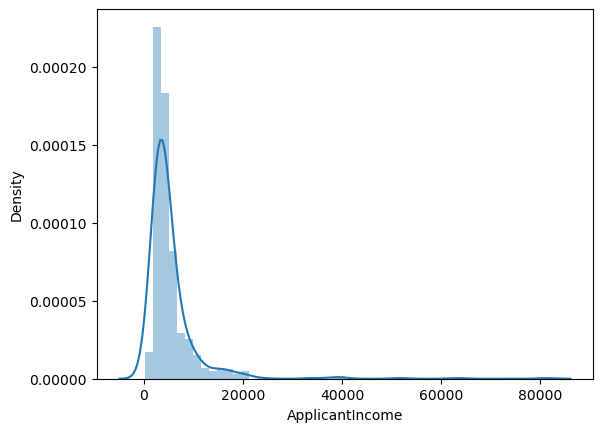

In [15]:
sns.distplot(df['ApplicantIncome'])

C:\Users\bat17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

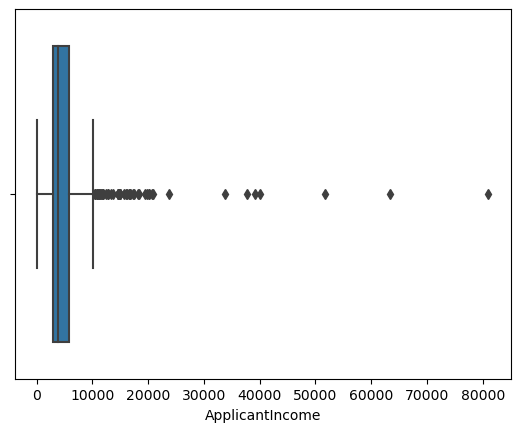

In [16]:
sns.boxplot(df['ApplicantIncome'])

In [18]:
# finding the IQR
percentile25=df['ApplicantIncome'].quantile(0.25)
percentile75=df['ApplicantIncome'].quantile(0.75)

In [19]:
percentile25

2877.5

In [20]:
iqr=percentile75-percentile25

In [21]:
iqr

2917.5

In [22]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [23]:
print('Upper limit',upper_limit)
print('lower limit',lower_limit)

Upper limit 10171.25
lower limit -1498.75


In [25]:
df[df['ApplicantIncome']>upper_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


In [26]:
df[df['ApplicantIncome']<lower_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [27]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

C:\Users\bat17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

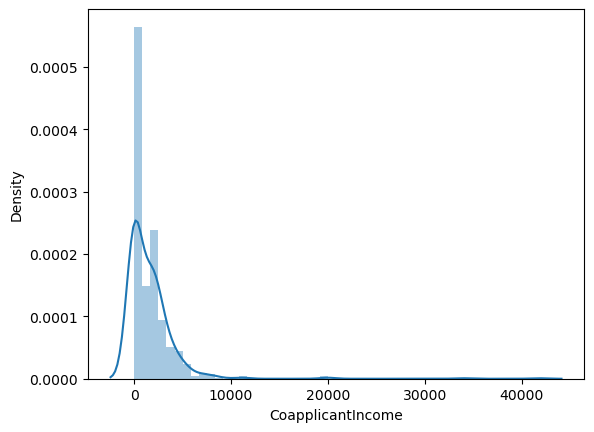

In [28]:
sns.distplot(df['CoapplicantIncome'])

In [29]:
percentile25=df['CoapplicantIncome'].quantile(0.25)
percentile75=df['CoapplicantIncome'].quantile(.75)

In [30]:
iqr=percentile75-percentile25

In [32]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [33]:
percentile75

2297.25

In [34]:
df[df['CoapplicantIncome']>upper_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


C:\Users\bat17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

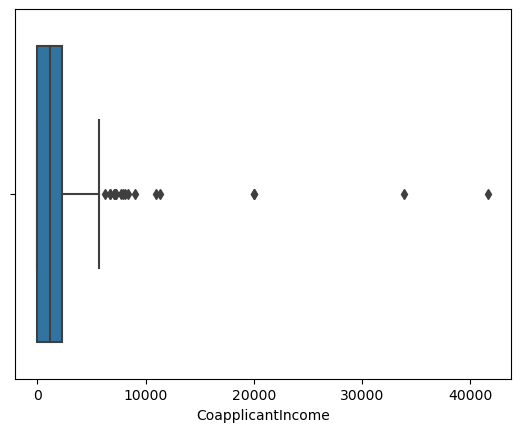

In [36]:
sns.boxplot(df['CoapplicantIncome'])

In [43]:
new_df=df[(df['CoapplicantIncome']>upper_limit)|(df['CoapplicantIncome']<lower_limit)]

In [44]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


C:\Users\bat17\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

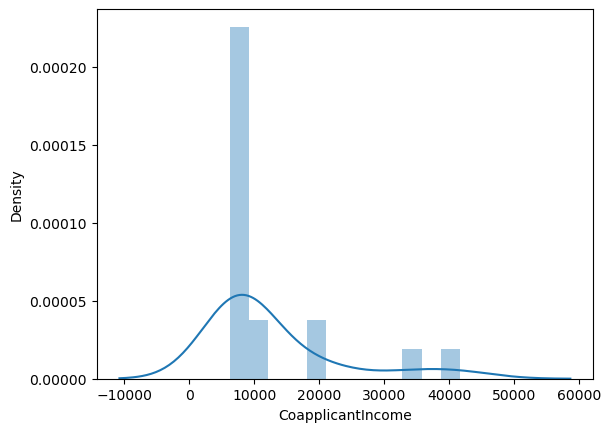

In [46]:
sns.distplot(new_df['CoapplicantIncome'])

C:\Users\bat17\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

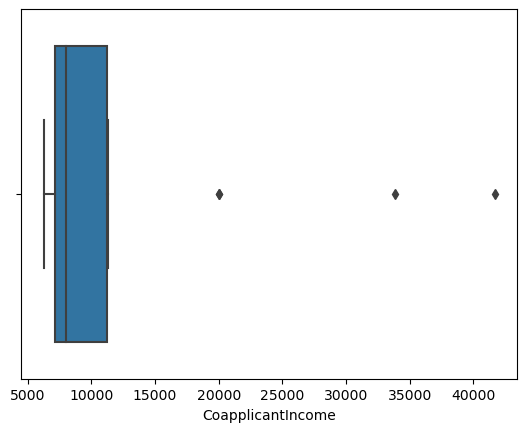

In [47]:
sns.boxplot(new_df['CoapplicantIncome'])

In [ ]:
# capping
np.where(df )